In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import warnings

# https://www.kaggle.com/datasets/mexwell/baltimore-city-employee-salaries
warnings.filterwarnings('ignore')
sns.set_theme()

In [49]:
# Читаем файл формата эксель

df = pd.read_excel("Baltimore_City_Employee_Salaries.xlsx")
df.head()


,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
0,PROJECT COORDINATOR,Convention Center,A91,38939,0.0,2012-06-13 00:00:00,2012,133223
1,JTPA TRAINEE MOMR,Youth Cust,W03,15080,0.0,2011-05-02 00:00:00,2011,153585
2,JTPA TRAINEE MOMR,Health Department,A65,0,0.0,2021-03-18 00:00:00,2021,8959
3,JTPA TRAINEE MOMR,Health Department,A65,0,0.0,2021-03-15 00:00:00,2021,8960
4,JTPA TRAINEE MOMR,Health Department,A65,0,0.0,2021-05-25 00:00:00,2021,8961


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153712 entries, 0 to 153711
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   jobClass      153528 non-null  object 
 1   agencyName    153712 non-null  object 
 2   agencyID      153712 non-null  object 
 3   annualSalary  153712 non-null  int64  
 4   grossPay      153712 non-null  float64
 5   hireDate      153710 non-null  object 
 6   fiscalYear    153712 non-null  int64  
 7   ObjectId      153712 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 9.4+ MB


In [22]:
df.grossPay.astype(float)

0             0.00
1             0.00
2             0.00
3             0.00
4             0.00
            ...   
153707    99995.62
153708    99997.26
153709    99997.43
153710    99997.83
153711    99998.58
Name: grossPay, Length: 153712, dtype: float64

In [7]:
# Пример строки данных
df.sample()

,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
120223,BUILDING SERVICES SUPERVISOR,Convention Center,A91,52836.0,55083.82,1986-01-03 00:00:00,2013,120502


<Axes: >

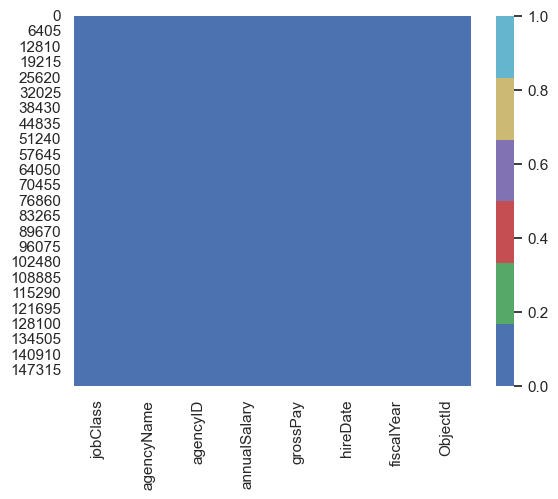

In [33]:
columns = df.columns[:]


sns.heatmap(df[columns].isnull(), cmap=sns.color_palette('deep6'))

In [90]:
df.isnull().sum() #Смотрим пустые ячейки

jobClass        184
agencyName        0
agencyID          0
annualSalary      0
grossPay          0
hireDate          2
fiscalYear        0
ObjectId          0
dtype: int64

In [91]:
df.duplicated().sum() #Смотрим сколько данных повторяется

0

In [92]:
df.dropna(inplace=True)
df.shape

(153526, 8)

In [51]:
diagram = px.pie(df.head(20), values='annualSalary', names='agencyName', title='Top 5 Annual Salary by Agency')
diagram.update_layout(width=800, height=600)
diagram.show()

In [52]:
diagram = px.pie(df.head(18), values='annualSalary', names='jobClass', title='Top 5 Annual Salary by profession')
diagram.update_layout(width=800, height=600)
diagram.show()

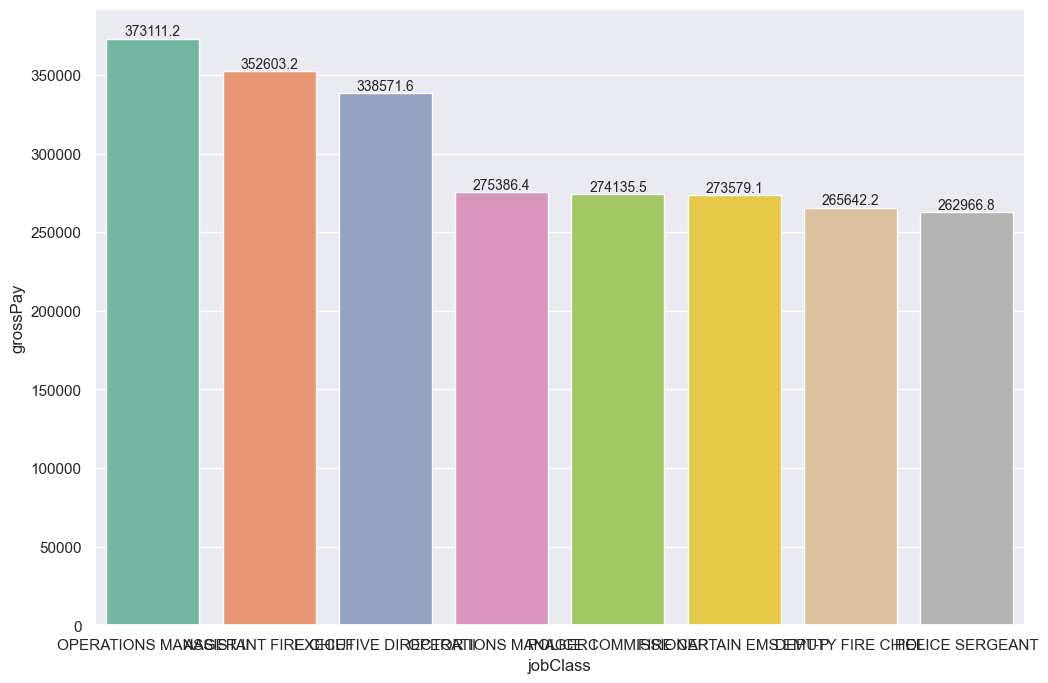

In [65]:
best_salary = df.sort_values('grossPay', ascending=False).head(10)
plt.figure(figsize=(20,8))
plt.title('top 10 best Salary')
ax = sns.barplot(x='jobClass', y='grossPay', data=best_salary, palette='Set2', errorbar=None)

for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.1f')


In [1]:
grow_salary = df.sort_values('annualSalary', ascending=False).head(2000)
plt.figure(figsize=(12,8))
data = pd.pivot_table(grow_salary, values='annualSalary', index='fiscalYear', columns='agencyName')
sns.heatmap(data, annot=False, fmt='.1f', cmap='crest')
plt.title('Growing Salary from 2011 to 2021 by Agency')

NameError: name 'df' is not defined